# Bank Customer Churn Analysis and Prediction

In [1]:
%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}
</style>

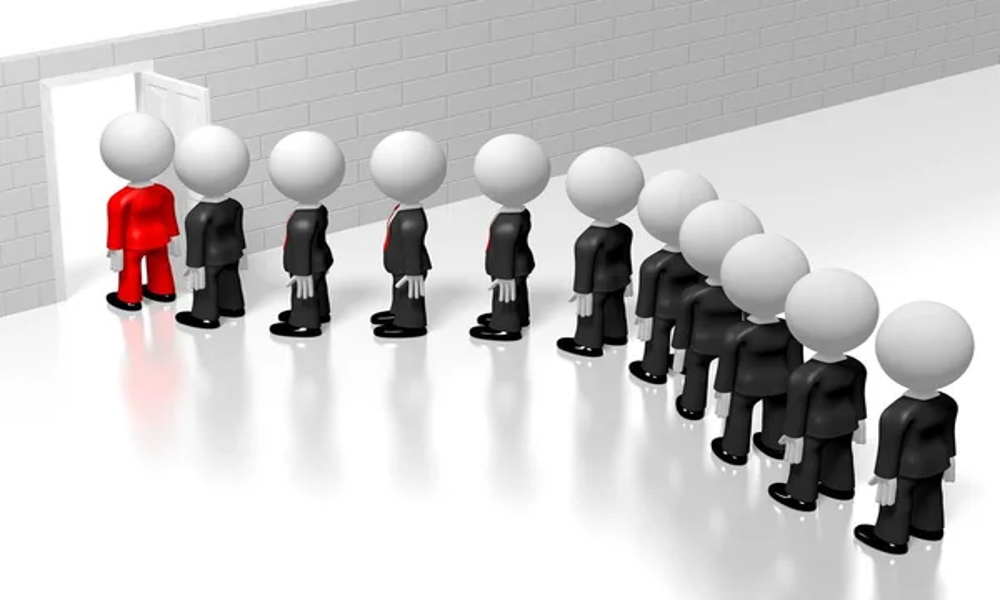

In [2]:
from PIL import Image
from IPython.display import display

#open the image file
image = Image.open('Churn.jpg')

#resizing the image to the desired height and width
new_width = 1000  # Adjusting the width
new_height = 600  # Adjusting the height
resized_image = image.resize((new_width, new_height))

display(resized_image)

This dataset focuses on customer's churn in the banking sector, examining various influencing factors. Before delving into the analysis, I believe it's  essential to clarity the concept of churn for better undertanding. Churn, also known as 'Exit,' refers to customers leaving a service or place, either voluntarily or due to specific circumstances. On the flip side, 'retention' represents those customers who choose to stay.

In this analysis, the aim is to predict whether specific factors impact churn rates within the bank. This exploration will provide valuable insights into the reasons behind customer departures and the factors that warrant examination. 


This dataset comprises a combination of variables, and it's worth noting its origin from Kaggle.

# The Data

- RowNumber: Corresponds to the record (row) number and has no effect on the output.
- CustomerId: Contains random values and has no impact on the customer's decision to leave the bank.
- Surname: The surname of a customer has no influence on their decision to leave the bank.
- CreditScore: Can affect customer churn, as customers with higher credit scores are less likely to leave.
- Geography: A customer's location can impact their decision to leave the bank.
- Gender: It's interesting to explore whether gender plays a role in customer departures.
- Age: Relevant, as older customers are less likely to leave the bank than younger ones.
- Tenure: Refers to the number of years the customer has been a client; older clients tend to be more loyal.
- Balance: A good indicator of customer churn; higher balances correlate with lower chances of leaving.
- NumOfProducts: Indicates the number of products a customer has purchased through the bank.
- HasCrCard: Denotes whether a customer has a credit card; this can affect churn rates.
- IsActiveMember: Active customers are less likely to leave the bank.
- EstimatedSalary: Similar to balance, customers with lower salaries are more likely to leave.
- Exited: Indicates whether the customer left the bank or not."


## Objectives of the Dataset

In this dataset, the primary focus revolves around the dependent variable, "Exited". This variable also serves as the target, and the objective is to predict and provide explanations for its outcomes using the various independent variables present in the dataset.

The overall goal is to gain profound insights into customer behavior and the driving forces behind their decisions to either stay or leave the bank.

In [3]:
#importing required libraries
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Explore the data

In [5]:
#the number of rows and columns 
rows, columns = df.shape
print(f"There are {rows} rows and {columns} columns in the dataset")

There are 10000 rows and 14 columns in the dataset


### Top 5 Values from the Dataset

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Bottom 5 Values in the Dataset

In [7]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Missing Values Summary

In [8]:
missing_values = df.isna().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Data Types

In [9]:
#accessing data types of df columns
column_data_types = df.dtypes
column_data_types

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### Duplicate Rows Count

In [10]:
#checking for duplicate rows in a df
duplicate_rows = df[df.duplicated()].count()
duplicate_rows

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Summary Statistics for All Columns

In [11]:
#getting the summary statistics of all columns in the df
summary_stats = df.describe(include='all')

#transpose the results 
summary_stats.T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


# Data Cleaning

#### 1. Convert Column Names to Lowercase

In [12]:
#converting all columns to lowercase
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

#### 2. Renaming DataFrame Columns

In [13]:
#renaming the df columns for clarity
df.rename(columns = {'rownumber' : 'row_number',
                      'customerid' : 'customer_id',
                      'creditscore' : 'credit_score',
                      'numofproducts': 'num_of_products',
                      'hascrcard': 'has_credit_card',
                      'isactivemember' : 'is_active_member',
                      'estimatedsalary': 'estimated_salary'}, inplace = True)

#### 3. Dropping Unnecessary Columns

In [14]:
#dropping the unnecessary columns
df = df.drop(columns = ["row_number", "customer_id", "surname"])

# Exploring Customer Behavior Patterns with EDA

- In this section, I'll delve into the dataset to gain insights and clarity regarding the factors influencing customer churn. This involves focusing on examining the distribution of age, customer segmentation and many more.

- "The 'Exited' variable, which have a value of either 0 or 1, is like a traffic light for us in this analysis. It helps to figure out whether a customer decided to stay with the bank (0) or leave (1). So, it's a bit like a 'stay or go' signal.

### 1. The Distribution of Churn (Exited)

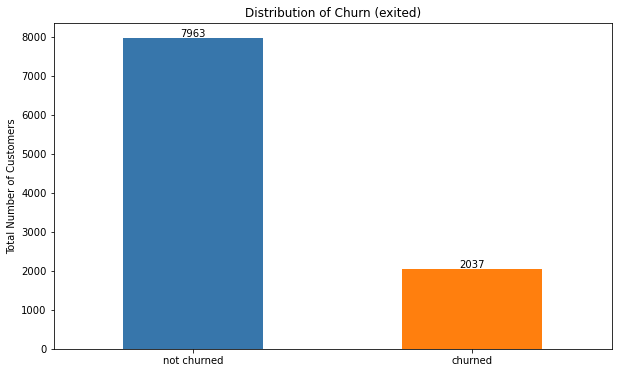

In [15]:
#count the occurrences of each class in the "exited" column
exited_counts = df['exited'].value_counts()

#creating labels for the x-axis
exited_labels = ['not churned', 'churned']

#plotting the distribution
plt.figure(figsize = (10, 6))
ax = exited_counts.plot(kind = 'bar', color = ['#3776ab', 'C1'])

#add the title
plt.title('Distribution of Churn (exited)')

#labeling the axes
plt.ylabel('Total Number of Customers')

#customize the x-axis tick labels
plt.xticks(range(len(exited_labels)), exited_labels, rotation=0)

#to get the values at the top of each bar
for p in ax.patches:
    if not np.isnan(p.get_height()):  # Check for NaN values
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha ='center', va = 'bottom')

#show the plot
plt.show()

The chart above indicates that that most customers (7963) which is about 79.63%, are still using the bank's services without leaving (not churned). On the other hand, around 20.37% of customers (2037) have decided to stop using the bank's services (churned).

### 2. Age Distribution Analysis: Understanding the Age Variation Between Churned and Non-Churned Customers

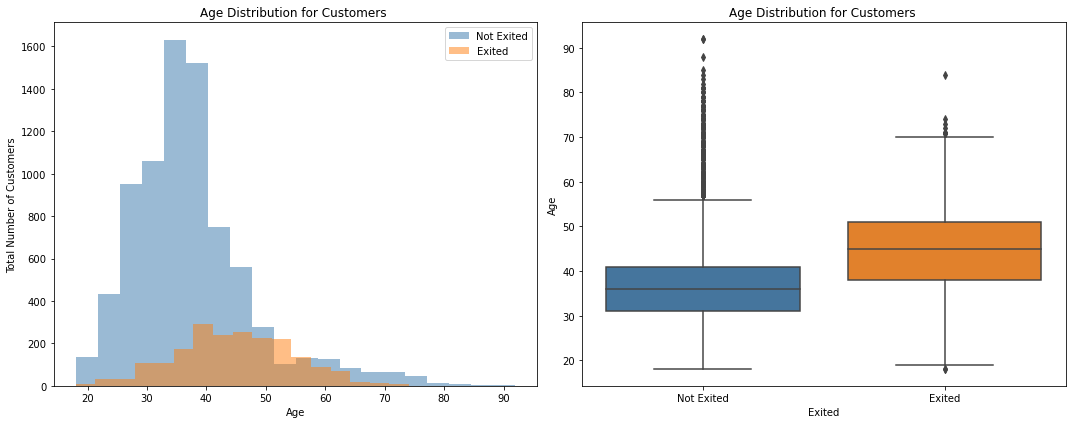

In [16]:
#creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#plot the histogram on the left subplot
axes[0].hist(df[df['exited'] == 0]['age'], bins=20, alpha=0.5, label='Not Exited', color='#3776ab')
axes[0].hist(df[df['exited'] == 1]['age'], bins=20, alpha=0.5, label='Exited', color='C1')
axes[0].set_title('Age Distribution for Customers ')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Total Number of Customers')
axes[0].legend()

#plot the box plots on the right subplot
sns.boxplot(x = 'exited', y = 'age', data = df, palette = ['#3776ab', 'C1'], ax = axes[1])
axes[1].set_title('Age Distribution for Customers ')
axes[1].set_xlabel('Exited')
axes[1].set_ylabel('Age')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Not Exited', 'Exited'])

plt.tight_layout()

#show the plot
plt.show()

-  This analysis reveals that both groups ('exited' vs 'not exited') include customers as young as 18 years old. There is also a significant difference in the age of the oldest individuals. Customers who remained with the bank have an age range extending up to 92 years, while exiting customers have a maximum age of 84 years.

-  It also appears that customers who leave the bank tend to be closer in age to each other compared to those who stay. This could mean that age plays a role in why some customers leave.

### 3. Customer Segmentation: Understanding How Different Customer Groups Relate to Churn

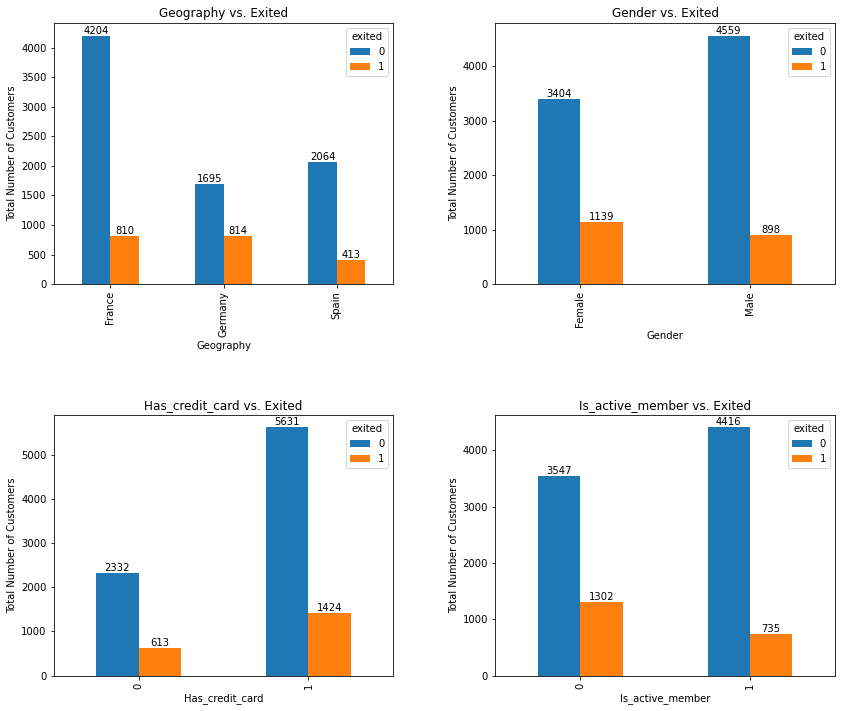

In [17]:
#list of categorical columns for the segmentation
categorical_columns = ["geography", "gender", "has_credit_card", "is_active_member"]

#creating subplots in a 2x2 grid with increased spacing
fig, axes = plt.subplots(2, 2, figsize = (14, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)  # Adjust spacing here

#creating individual bar charts for categorical columns
for i, col in enumerate(categorical_columns):

    #group the data by the categorical column and "exited" column and get the counts
    data_grouped = df.groupby([col, 'exited']).size().unstack()

    #creating a bar chart for the current categorical column
    ax = data_grouped.plot(kind = 'bar', ax = axes[i // 2, i % 2])

    #setting the title by capilizing it, x-axis label, and y-axis label
    ax.set_title(f"{col.capitalize()} vs. Exited")
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel("Total Number of Customers")

#to get the values at the top of each bar
    for p in ax.patches:
        if not np.isnan(p.get_height()):  # Check for NaN values
            ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'bottom')

#show the plots
plt.show()

-  1. Geographic Impact:
In France, 39% of customers left, while in Spain, only 20% left. Germany falls somewhere in between.
-  2. Gender Matters:
Gender plays a role. Females (about 56%) decide to leave, whereas males (about 44%) make the same choice.
women are more inclined to disembark.
-  3. Credit Cards:
Customers who own credit cards exhibit a slightly higher churn rate, with 56% opting to leave the bank while customers without credit cards have a lower churn rate, as only 44% decide to exit.
-  4. Activity Level:
Activity matters too. Active member (like using  account actively) makes you more likely to stay while those that are not active has higher chances leaving.

### 4. Relationship Between Account Balance and Churn

In [18]:
#define the ages column into the bin edges
bin_edges = [-1, 50000, 100000, 150000, 200000, 250000, 300000]
b_edges = ['0-50000', '50001-100000', '100001-150000', '150001-200000', '200001-250000', '250000+']


#creating a new column that represents the balance bins
df['balance_range'] = pd.cut(df['balance'], bins = bin_edges, labels = b_edges)

#showing the first few rows of the  new column 
df['balance_range'].head(3).reset_index().drop('index', axis = 1)

,balance_range
0,0-50000
1,50001-100000
2,150001-200000


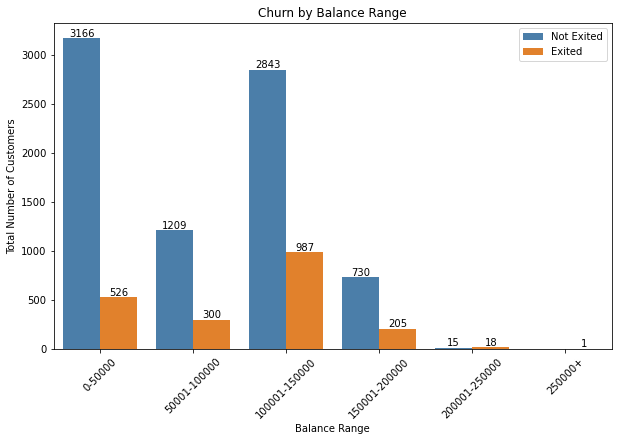

In [27]:
plt.figure(figsize = (10, 6)) #create a bar plot

#plotting the distribution
ax = sns.countplot(data = df, x ='balance_range', hue = 'exited', palette = {0: '#3b7fb9', 1: 'C1'})

#add the title
plt.title('Churn by Balance Range')

#labeling the axes
plt.xlabel('Balance Range')
plt.ylabel('Total Number of Customers')

plt.xticks(rotation = 45)  #rotate x-axis labels for better readability

#adding the figures on top of each bar
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):  # Check if height is not NaN
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha = 'center', va = 'bottom')

plt.legend(labels = ['Not Exited', 'Exited'], loc = 'upper right')

#show the plot
plt.show()


 Many customers have lower account balances, especially in the '0-50000' and '50001-100000' ranges. Unfortunately, more customers tend to leave when their balances are lower. On the bright side, customers with bigger balances, like those in the '100001-150000' and '150001-200000' ranges, tend to stay with the bank

### 5. Relationship Between Estimated Salary and Balance

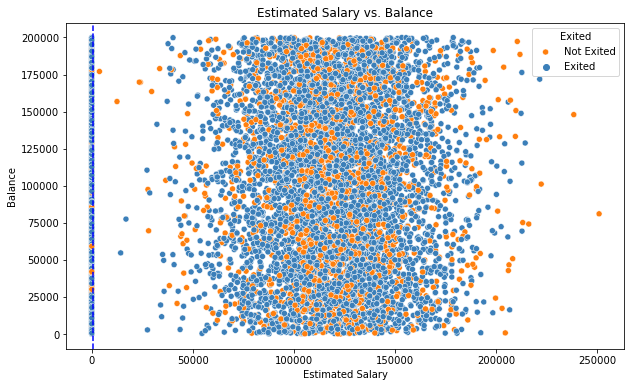

In [36]:
#to create a scatter plot
plt.figure(figsize = (10, 6))

#plotting the distribution
sns.scatterplot(data = df, y = 'estimated_salary', x = 'balance', hue = 'exited', palette = {0: '#3b7fb9', 1: 'C1'})

#adding a title
plt.title('Estimated Salary vs. Balance')

#addding a label
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')

#adding the legend
plt.legend(title = 'Exited', loc = 'upper right', labels = ['Not Exited', 'Exited'])

#show the plot
plt.show()

It is evident that estimated salary and balance share a similar pattern without a clear linear relationship. Notably, a significant portion of customers who exited (exited = 1) have an estimated salary of 0, suggesting possible account closure with a zero balance before departure. This behavior may indicate inactivity or fund withdrawal.

Also, Customers who stayed have a wide range of incomes, while those who left have incomes clustered around the middle.

### 6. How Do Credit Cards and Active Memberships Impact Customer Behaviour?

In [21]:
#grouping by credit card and activeness of the members
grouped_data = df.groupby(['has_credit_card', 'is_active_member'])

#to calculate churn rate for each group
churn_rate = grouped_data['exited'].mean() * 100

#to calculate retention rate for each group, since churn rate + retention rate = 100
retention_rate = 100 - churn_rate

#showing the results
print("churn rate by credit card and active members:", '\n')
print(churn_rate)

print("\n\nretention rate by credit card and active members:", '\n')
print(retention_rate)


churn rate by credit card and active members: 

has_credit_card  is_active_member
0                0                   25.695931
                 1                   16.386010
1                0                   27.320186
                 1                   13.362905
Name: exited, dtype: float64


retention rate by credit card and active members: 

has_credit_card  is_active_member
0                0                   74.304069
                 1                   83.613990
1                0                   72.679814
                 1                   86.637095
Name: exited, dtype: float64


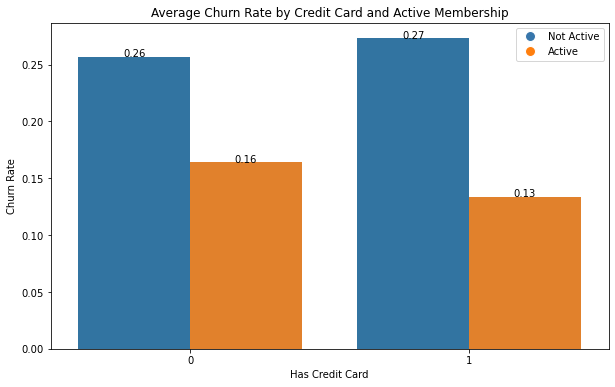

In [22]:
#grouping by credit card and active members
grouped_data = df.groupby(['has_credit_card', 'is_active_member'])['exited'].mean().reset_index()

#creating a bar chart
plt.figure(figsize = (10, 6))
ax = sns.barplot(data = grouped_data, x = 'has_credit_card', y = 'exited', hue = 'is_active_member')

#add labels and a legend with custom colors
plt.xlabel('Has Credit Card')
plt.ylabel('Churn Rate')
plt.title('Average Churn Rate by Credit Card and Active Membership')

#define custom colors for legend labels
legend_colors = ['#3776ab', 'C1']

#create custom legend handles with specified colors
legend_labels = ['Not Active', 'Active']
legend_handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', label = label, markerfacecolor = color, markersize = 10) for label, color in zip(legend_labels, legend_colors)]
#add the legend with custom handles
plt.legend(handles = legend_handles, loc = 'upper right')

#annotate with mean values dervied on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center')

#show the plot
plt.show()


It is realised that customers who have credit cards and are active members tend to be loyal, with only around 13.36% leaving. However, if customers have credit cards but are not active members, they are more likely to leave, with a higher churn rate of about 27.32%. Similarly, customers without credit cards and inactive membership tend to leave more often, with a churn rate of about 25.70%.

In summary, having a credit card and being an active member encourages customer retention, while having a credit card but not being active increases the likelihood of leaving.

### 7. What is the Impact of Credit Cards and Active Membership on Churn Rates?

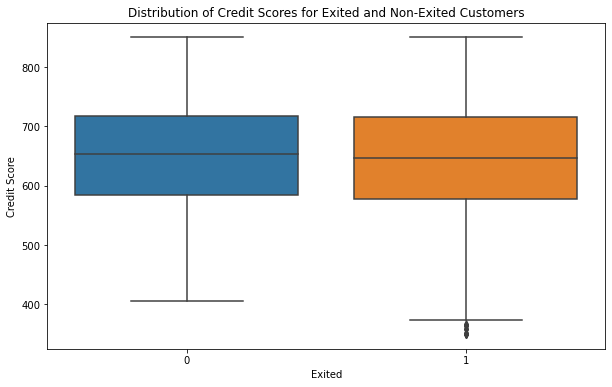

In [23]:
#set the size
plt.figure(figsize = (10, 6))

#create a boxplot
sns.boxplot(x = 'exited', y = 'credit_score', data = df)

#add a label
plt.xlabel('Exited')
plt.ylabel('Credit Score')

#add a title
plt.title('Distribution of Credit Scores for Exited and Non-Exited Customers')

#show the plot
plt.show()

Looking at the credit scores of customers who left and those who stayed, there's no any big differences. Both groups had about the same average credit score, and their credit scores ranged from low to high in a similar way. This basically indicates that credit scores don't seem to be the main reason why customers decide to leave or stay with the company.

# Overall Insights and Actionable Recommendation

- Customer Distribution: The majority of customers (about 79.63%) are still loyal to the bank, but approximately 20.37% have left.

- Age Factor: Customers of all age groups exist in both categories. Those who stayed represent a wider age range, while those who left are clustered in similar age groups.

- Geographic Impact: France records the highest churn rate at 39%, followed by Germany (in between) and Spain with the lowest rate at 20%, according to `Worldometer 2023`. This variation is likely due to France's large population of 64.8 million and well-established banking sector. In contrast, Spain, with 47.5 million people, and Germany, with 83.3 million, have different banking landscapes, influencing customer numbers and churn rates.

- Gender Influence: More females (56%) exit compared to males (44%), implying gender plays a role in customer decisions.

- Credit Card Effect: Customers with credit cards exhibit a slightly higher churn rate (56%) compared to those without credit cards (44%).
- Activity Level: Active members are inclined to stay, while non-active members are prone to leave.
- Balance Range: Many customers have lower balances, and churn rates are higher in these ranges. 
- Estimated Salary: There is no clear linear relationship between estimated salary and churn, but customers with an estimated salary of 0 tend to leave. 
- Credit Score: There are no significant differences in credit scores between customers who exited and those who stayed.


#### Recommendations
Based on the insights gathered from the analysis above;
- In order keep these customers from leaving, they should be encouraged to use their credit cards, especially if they have one but don't use it much. Also giving them rewards or perks for using their cards, like cashback or discounts goes a long way to make them want to keep using it.

- Customer engagement strategies should be implemented particularly for non-active members. These strategies should include actively encouraging them to use their accounts, ultimately reducing churn and fostering stronger customer loyalty.

- Initiatives should be created to retain customers with lower balances by offering additional services or incentives. This approach can effectively retain a significant portion of the customer base and enhance overall profitability.

- Lastly, Recognizing the impact of gender on churn rates is advantageous. It allowsto create marketing and services that specifically cater to men and women to reduce the number of people leaving the company, especially among females, and keep more customers happy and loyal.


# Preparing Data for Predictive Models

- In this section, I will analyze the data for outliers, assess data skewness, explore correlations, and conduct crucial data preprocessing tasks. This includes addressing missing values, identifying outliers, and encoding categorical variables to ensure the data is well-prepared for building predictive models.

### 1. Evaluating the Correlation of Numerical Columns with the Target Variable

In [33]:
df.head(2)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,balance_range
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0-50000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,50001-100000


In [45]:
#selecting only the numerical columns
numerical_columns = df.select_dtypes(include = 'number')

#showing the relationship between loan_status and other columns
num_correlations = numerical_columns.corrwith(df['exited'])

#display the correlations
print(num_correlations.sort_values(ascending=False))

exited              1.000000
age                 0.285323
balance             0.118533
estimated_salary    0.012097
has_credit_card    -0.007138
tenure             -0.014001
credit_score       -0.027094
num_of_products    -0.047820
is_active_member   -0.156128
dtype: float64
